## Data Analysis 
- analys
- Present the cleaning and enhancement types in the individual video.
- comment
- video individual
- doc



In [5]:
import pandas as pd
import warnings
import mariadb
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [15]:
username = 'cip_user'
password = 'cip_pw'
database_name = 'CIP'

conn = mariadb.connect(
        user=username,
        password=password,
        host="localhost",
        port=3306,
        database=database_name
    )
mycursor = conn.cursor()

df = pd.read_sql_query("SELECT * FROM intersport_stage3;", conn)
conn.close()

In [16]:
#df = pd.read_csv("../Data/gears_stage3.csv", sep=',')

In [17]:
df.head(4)

,location,location_town,first_rental_day,return_date,gear_name,price,rental_duration,price_per_day,gear_class
0,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,ski exclusive,49.5,1,49.5,ski
1,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,ski premium,34.2,1,34.2,ski
2,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,telemark ski premium,49.5,1,49.5,ski
3,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,ski economy,26.1,1,26.1,ski


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1574 entries, 0 to 1573
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   location          1574 non-null   object 
 1   location_town     1574 non-null   object 
 2   first_rental_day  1574 non-null   object 
 3   return_date       1574 non-null   object 
 4   gear_name         1574 non-null   object 
 5   price             1574 non-null   float64
 6   rental_duration   1574 non-null   int64  
 7   price_per_day     1574 non-null   float64
 8   gear_class        1574 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 110.8+ KB


In [19]:
df['first_rental_day'] = pd.to_datetime(df['first_rental_day'])
df['return_date'] = pd.to_datetime(df['return_date'])


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1574 entries, 0 to 1573
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   location          1574 non-null   object        
 1   location_town     1574 non-null   object        
 2   first_rental_day  1574 non-null   datetime64[ns]
 3   return_date       1574 non-null   datetime64[ns]
 4   gear_name         1574 non-null   object        
 5   price             1574 non-null   float64       
 6   rental_duration   1574 non-null   int64         
 7   price_per_day     1574 non-null   float64       
 8   gear_class        1574 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 110.8+ KB


In [27]:
product = "ski premium"
df_selection = df[['location_town', 'price_per_day']][df['gear_name'].str.lower() == product]
df_prices = df_selection.groupby('location_town')['price_per_day'].mean().reset_index()
most_expensive = df_prices.loc[df_prices['price_per_day'].idxmax()].location_town
cheapest = df_prices.loc[df_prices['price_per_day'].idxmin()].location_town

print(f"most_expensive:{most_expensive} cheapest:{cheapest}")

most_expensive:Sils i.E. cheapest:Buttes La Robella


In [ ]:
df_prices.boxplot(column='price_per_day', grid=False).set_title(f"product:{product} -- most exp:{most_expensive};cheapest:{cheapest}")

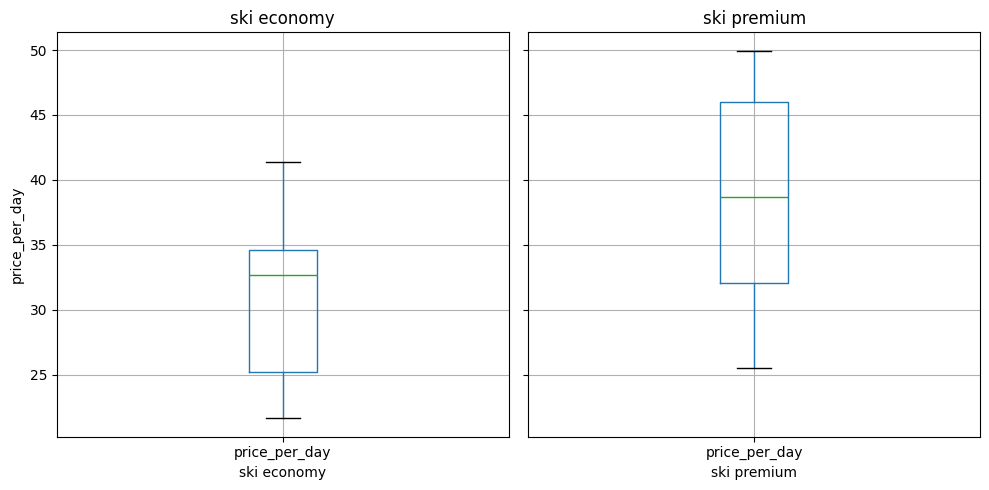

In [33]:
product1 = "ski economy"
df_selection = df[['location_town', 'price_per_day']][df['gear_name'].str.lower() == product1]
df_econ = df_selection.groupby('location_town')['price_per_day'].mean().reset_index()

product2 = "ski premium"
df_selection = df[['location_town', 'price_per_day']][df['gear_name'].str.lower() == product2]
df_prem = df_selection.groupby('location_town')['price_per_day'].mean().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)
df_econ.boxplot(column='price_per_day', ax=axes[0])
axes[0].set_title(product1)
axes[0].set_xlabel(product1)
axes[0].set_ylabel('price_per_day')
# Boxplot for 'Value2'
df_prem.boxplot(column='price_per_day', ax=axes[1])
axes[1].set_title(product2)
axes[1].set_xlabel(product2)
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'product:ski economy -- most exp:Sils i.E.;cheapest:Buttes La Robella')

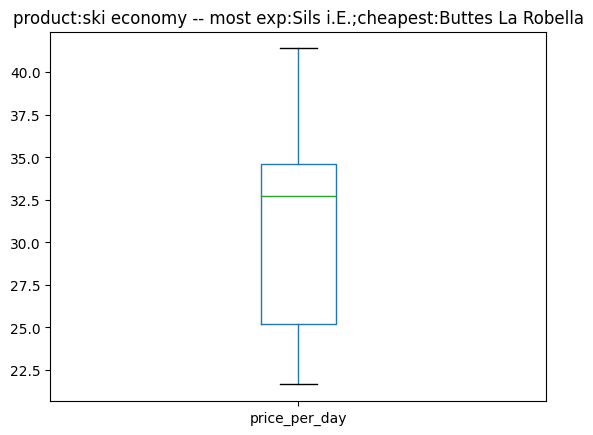

In [31]:
product = "ski economy"
df_selection = df[['location_town', 'price_per_day']][df['gear_name'].str.lower() == product]
df_prices = df_selection.groupby('location_town')['price_per_day'].mean().reset_index()
most_expensive = df_prices.loc[df_prices['price_per_day'].idxmax()].location_town
cheapest = df_prices.loc[df_prices['price_per_day'].idxmin()].location_town

df_prices.boxplot(column='price_per_day', grid=False).set_title(f"product:{product} -- most exp:{most_expensive};cheapest:{cheapest}")


Text(0.5, 1.0, 'product:helmet -- most exp:Münster (Goms);cheapest:Les Diablerets')

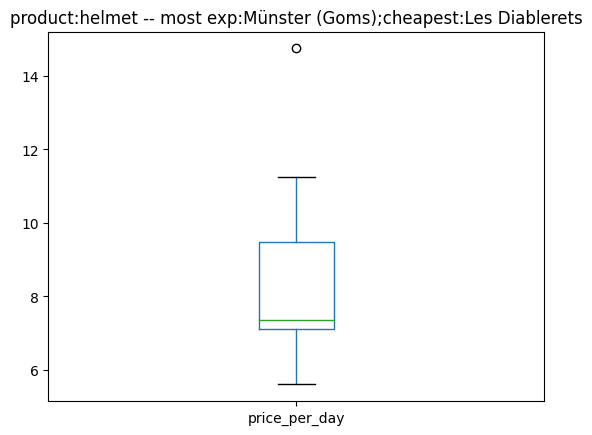

In [32]:
product = "helmet"
df_selection = df[['location_town', 'price_per_day']][df['gear_name'].str.lower() == product]
df_prices = df_selection.groupby('location_town')['price_per_day'].mean().reset_index()
most_expensive = df_prices.loc[df_prices['price_per_day'].idxmax()].location_town
cheapest = df_prices.loc[df_prices['price_per_day'].idxmin()].location_town

df_prices.boxplot(column='price_per_day', grid=False).set_title(f"product:{product} -- most exp:{most_expensive};cheapest:{cheapest}")


In [33]:
df.head(3)

,location,location_town,first_rental_day,return_date,gear_name,price,rental_duration,price_per_day,gear_class
0,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,Ski Exclusive,49.5,1,49.5,ski
1,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,Ski Premium,34.2,1,34.2,ski
2,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,Telemark Ski Premium,49.5,1,49.5,ski


In [34]:
df['gear_class'].value_counts().reset_index()

,index,gear_class
0,clothes,561
1,ski,532
2,snowboard,196
3,helmet,121
4,set,98
5,sledge,34
6,other,23
7,services,9


In [37]:
df.groupby('location_town')['gear_class'].nunique().reset_index(name='distinct_gear_class_count').sort_values(by='distinct_gear_class_count', ascending=False)



,location_town,distinct_gear_class_count
16,Le Sentier,7
33,Scuol,7
0,Aeschi,6
40,Vals,6
38,St. Peter,6
35,Silvaplana,6
34,Sils i.E.,6
28,Rathvel s/Châtel-St-Denis,6
27,Oberwil i.S.,6
43,Villars-sur-Ollon,6
